In [2]:
import pandas as pd
import os

# Define the base directory where the files are located
base_dir = r"C:\Users\USER\Documents\repos\1_ ASTEROID"

# List of CSV file paths using absolute paths
csv_files = [
    os.path.join(base_dir, "dataset_part1.csv"),
    os.path.join(base_dir, "dataset_part2.csv"),
    os.path.join(base_dir, "dataset_part3.csv"),
    os.path.join(base_dir, "dataset_part4.csv"),
    os.path.join(base_dir, "dataset_part5.csv")
]

# Check if all files exist
for file in csv_files:
    if not os.path.isfile(file):
        print(f"File not found: {file}")
        raise FileNotFoundError(f"File not found: {file}")

# Read each CSV file into a DataFrame and store it in a list
dfs = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
database = pd.concat(dfs, ignore_index=True)


# Checking the data frame
database.head(1)


C:\Users\USER\AppData\Local\Temp\ipykernel_18844\366564285.py:23: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in csv_files]
C:\Users\USER\AppData\Local\Temp\ipykernel_18844\366564285.py:23: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in csv_files]


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.4,939.4,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301


In [4]:
database.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [3]:
sample_database = database.sample(n=15000, random_state=42)
sample_database.head(1)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
323650,a0323651,2323651,323651 (2005 BR20),323651,NaN,NaN,N,N,18.2,NaN,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452


In [18]:
import pandas as pd

# List of columns to select
columns_to_select = ['H', 'diameter', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om']

# Filter the dataset to include only the selected columns
database_filtered = database.filter(columns_to_select)

In [19]:
categorical_filter = ['neo', 'pha', 'orbit_id', 'equinox', 'class']
db_categorical = database.filter(categorical_filter)

In [20]:
# Como la cantidad de datos es muy grande (mas de 900000 datos) cogemos una muestra aleatoria de 250000
sample_df = database_filtered.sample(n=150000, random_state=42)
sample_df.head(1)

,H,diameter,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om
323650,18.2,NaN,NaN,2459000.5,59000,20200531.0,0.139451,2.268877,1.952481,3.187887,112.798677


In [22]:
sample_df1 = db_categorical.sample(n=15000, random_state=42)
sample_df1.head(1)

,neo,pha,orbit_id,equinox,class
323650,N,N,JPL 8,J2000,MBA


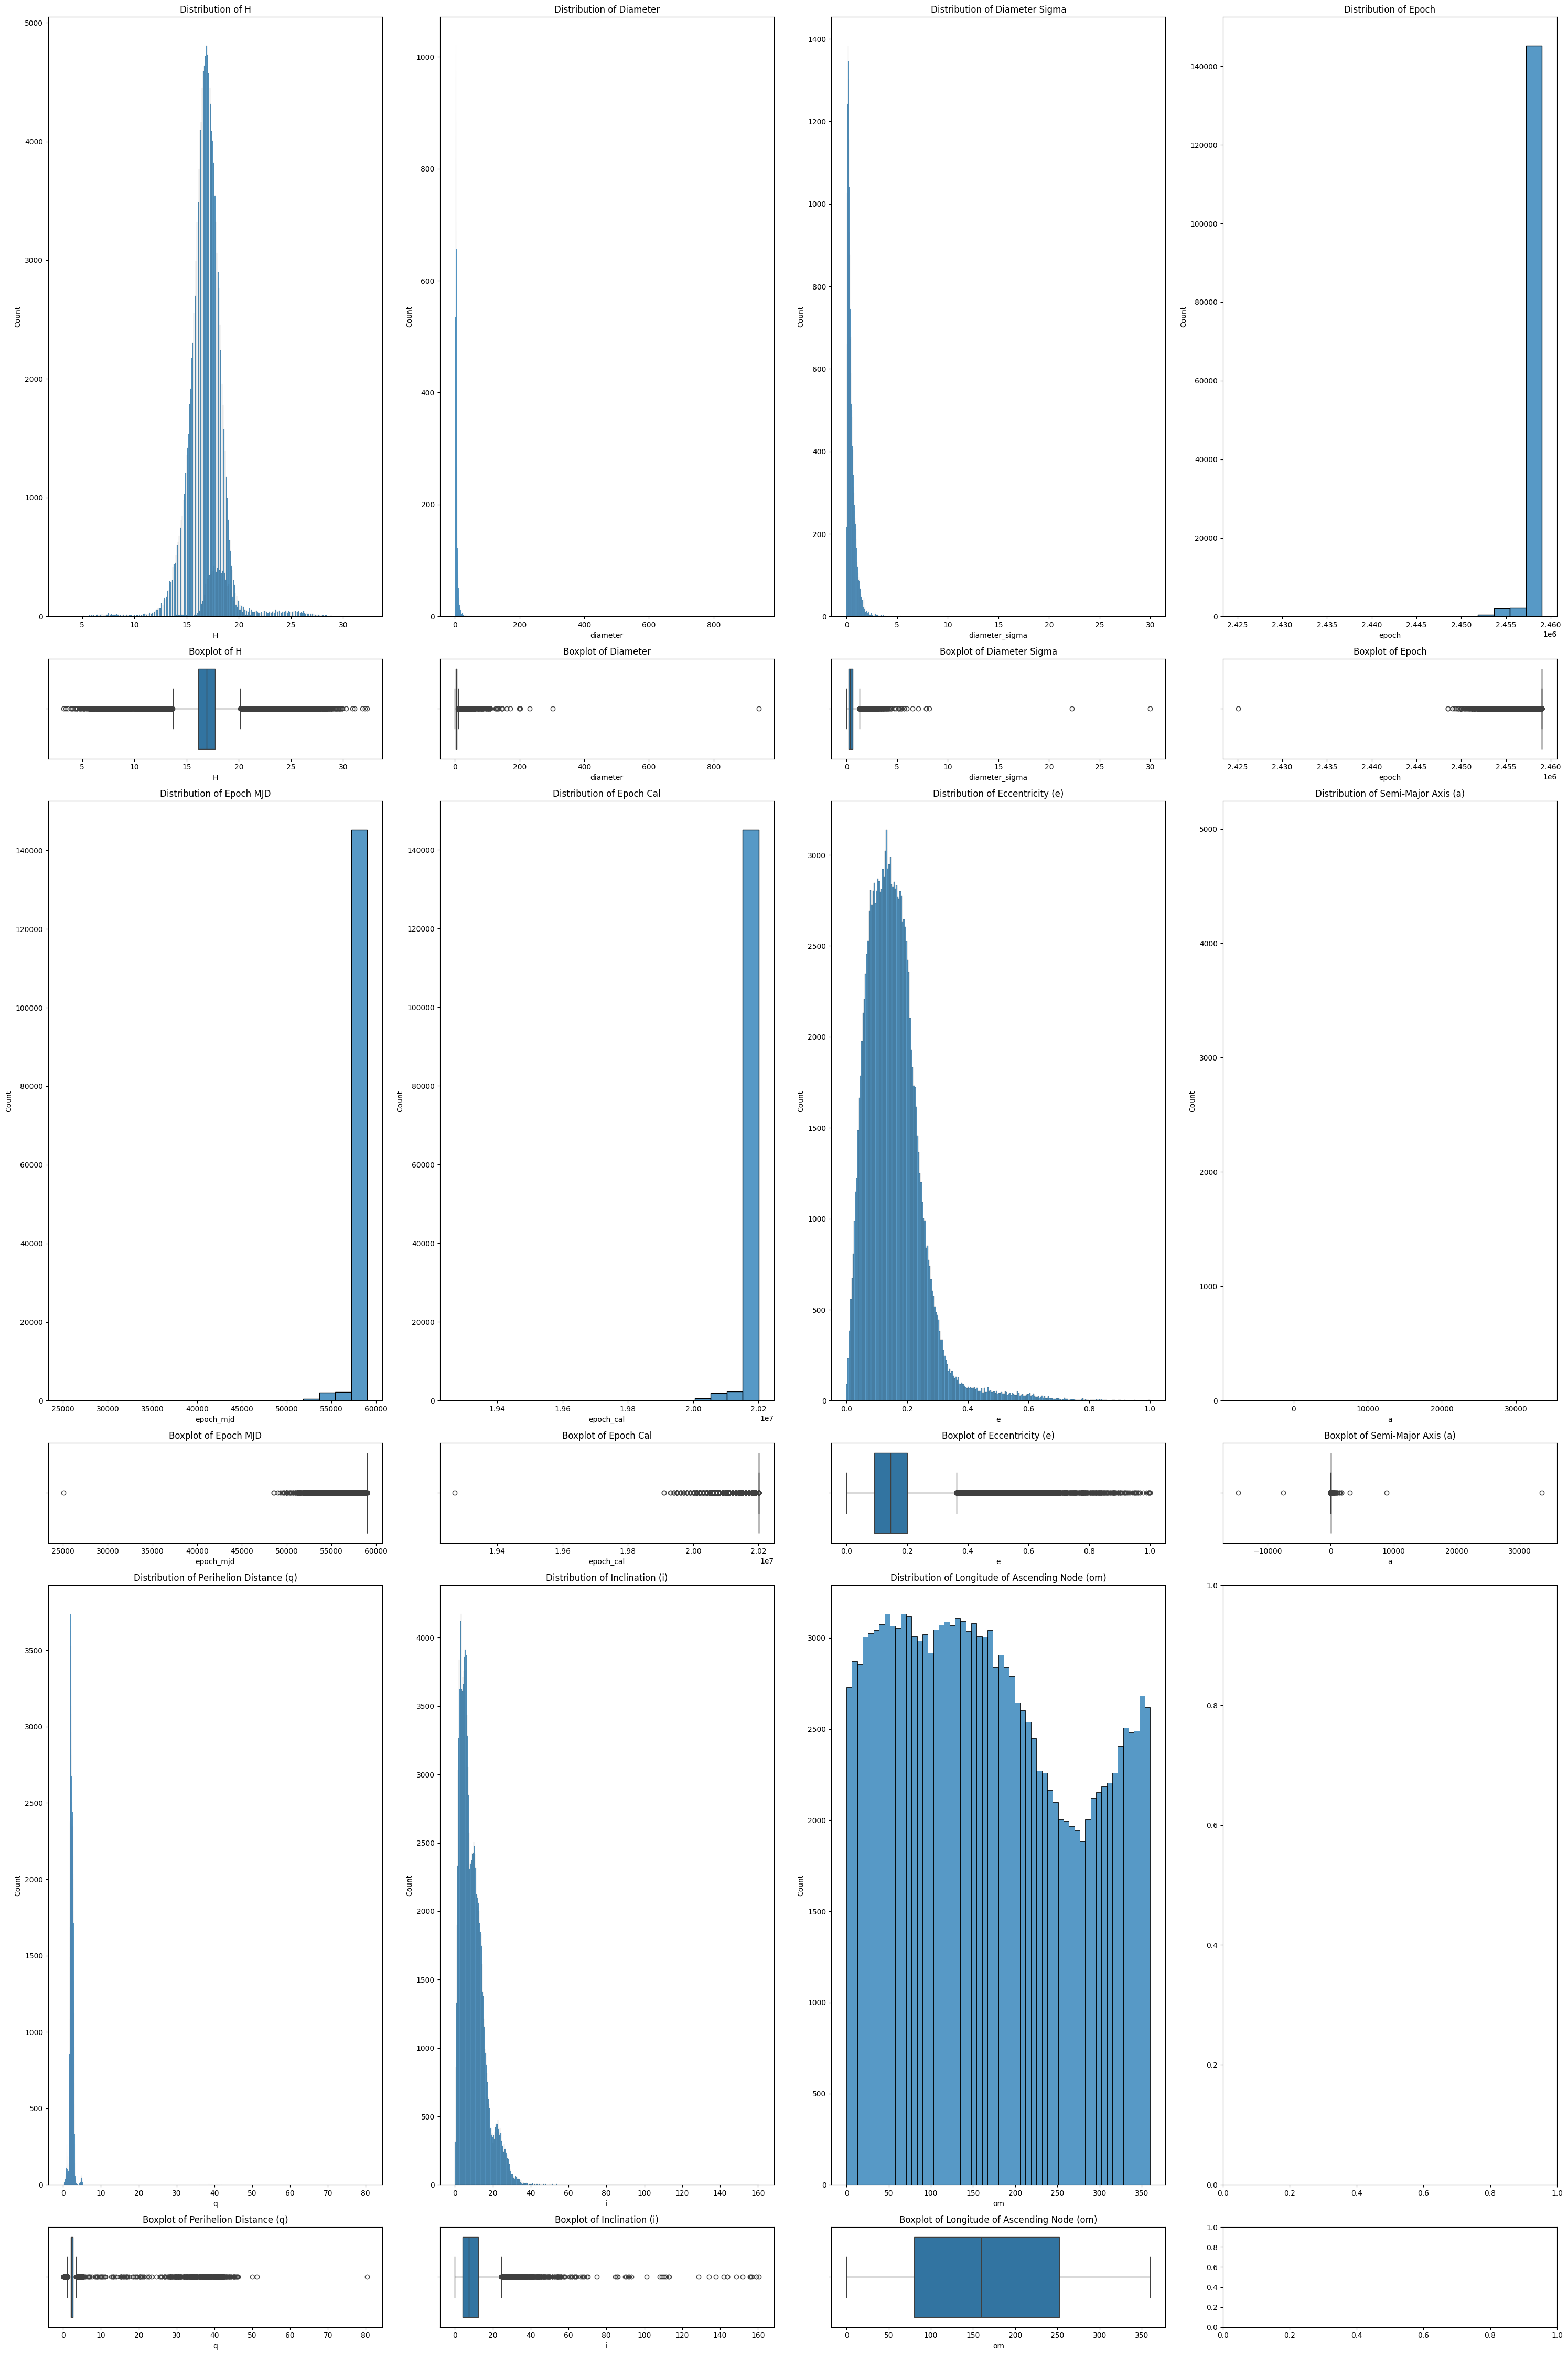

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(6, 4, figsize=(30, 45), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

sns.histplot(ax=axis[0, 0], data=sample_df, x="H")
axis[0, 0].set_title("Distribution of H")
sns.boxplot(ax=axis[1, 0], data=sample_df, x="H")
axis[1, 0].set_title("Boxplot of H")

sns.histplot(ax=axis[0, 1], data=sample_df, x="diameter")
axis[0, 1].set_title("Distribution of Diameter")
sns.boxplot(ax=axis[1, 1], data=sample_df, x="diameter")
axis[1, 1].set_title("Boxplot of Diameter")

sns.histplot(ax=axis[0, 2], data=sample_df, x="diameter_sigma")
axis[0, 2].set_title("Distribution of Diameter Sigma")
sns.boxplot(ax=axis[1, 2], data=sample_df, x="diameter_sigma")
axis[1, 2].set_title("Boxplot of Diameter Sigma")

sns.histplot(ax=axis[0, 3], data=sample_df, x="epoch")
axis[0, 3].set_title("Distribution of Epoch")
sns.boxplot(ax=axis[1, 3], data=sample_df, x="epoch")
axis[1, 3].set_title("Boxplot of Epoch")

sns.histplot(ax=axis[2, 0], data=sample_df, x="epoch_mjd")
axis[2, 0].set_title("Distribution of Epoch MJD")
sns.boxplot(ax=axis[3, 0], data=sample_df, x="epoch_mjd")
axis[3, 0].set_title("Boxplot of Epoch MJD")

sns.histplot(ax=axis[2, 1], data=sample_df, x="epoch_cal")
axis[2, 1].set_title("Distribution of Epoch Cal")
sns.boxplot(ax=axis[3, 1], data=sample_df, x="epoch_cal")
axis[3, 1].set_title("Boxplot of Epoch Cal")

sns.histplot(ax=axis[2, 2], data=sample_df, x="e")
axis[2, 2].set_title("Distribution of Eccentricity (e)")
sns.boxplot(ax=axis[3, 2], data=sample_df, x="e")
axis[3, 2].set_title("Boxplot of Eccentricity (e)")

sns.histplot(ax=axis[2, 3], data=sample_df, x="a")
axis[2, 3].set_title("Distribution of Semi-Major Axis (a)")
sns.boxplot(ax=axis[3, 3], data=database_filtered, x="a")
axis[3, 3].set_title("Boxplot of Semi-Major Axis (a)")

sns.histplot(ax=axis[4, 0], data=sample_df, x="q")
axis[4, 0].set_title("Distribution of Perihelion Distance (q)")
sns.boxplot(ax=axis[5, 0], data=sample_df, x="q")
axis[5, 0].set_title("Boxplot of Perihelion Distance (q)")

sns.histplot(ax=axis[4, 1], data=sample_df, x="i")
axis[4, 1].set_title("Distribution of Inclination (i)")
sns.boxplot(ax=axis[5, 1], data=sample_df, x="i")
axis[5, 1].set_title("Boxplot of Inclination (i)")

sns.histplot(ax=axis[4, 2], data=sample_df, x="om")
axis[4, 2].set_title("Distribution of Longitude of Ascending Node (om)")
sns.boxplot(ax=axis[5, 2], data=sample_df, x="om")
axis[5, 2].set_title("Boxplot of Longitude of Ascending Node (om)")

# Adjust spacing
plt.tight_layout()
plt.show()


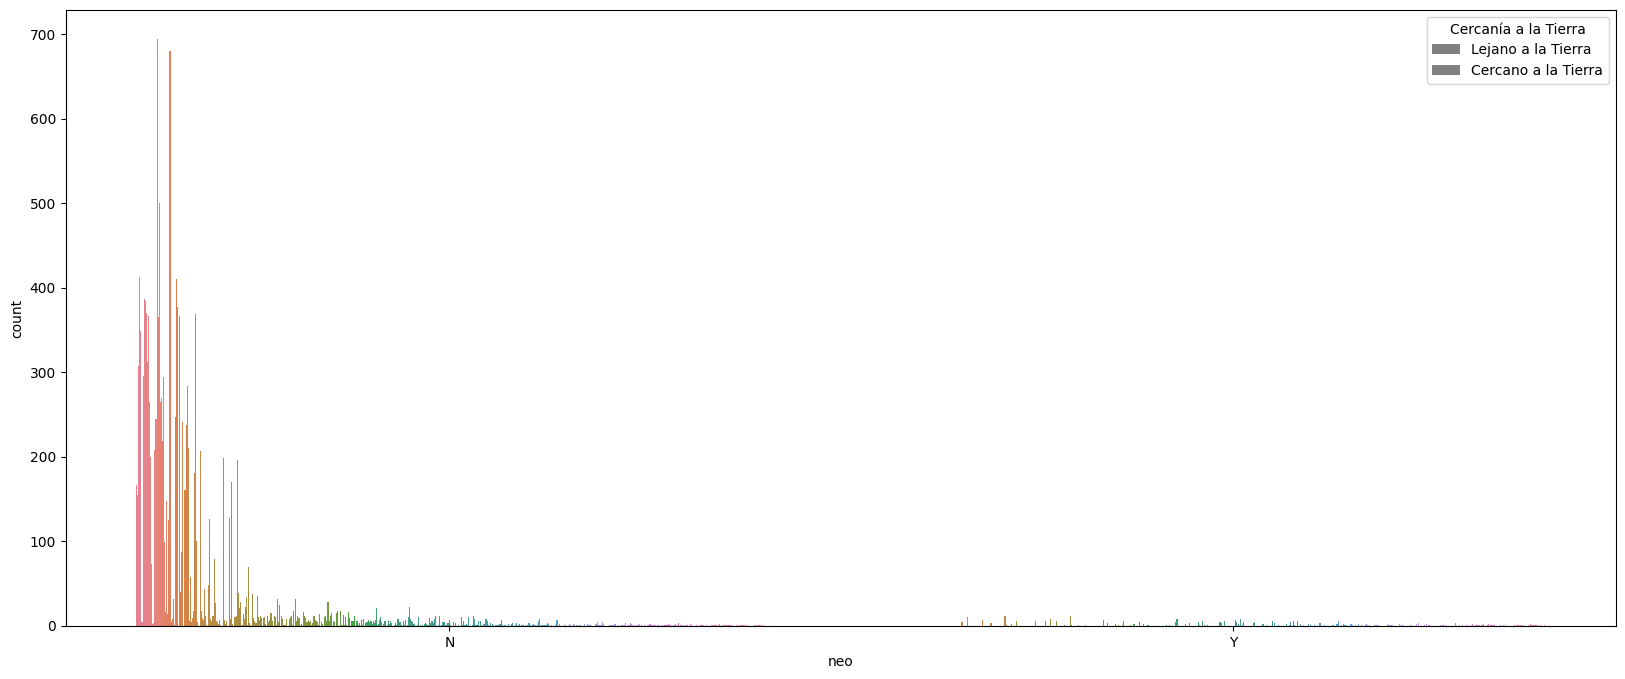

In [33]:
# Analisis de variables categorica - categorica

# Crear una nueva columna combinando las variables deseadas
sample_df1['combined_hue'] = (sample_df1['pha'].astype(str) + '_' +
                                     sample_df1['orbit_id'].astype(str) + '_' +
                                     sample_df1['equinox'].astype(str) + '_' +
                                     sample_df1['class'].astype(str))

# Crear el gráfico
fig, axis = plt.subplots(figsize=(20, 8))

sns.countplot(data=sample_df1, x="neo", hue="combined_hue", ax=axis, legend=False)

# Definir la leyenda personalizada
legend_labels = {'N_NEO_orbit_id_equinox_class': 'Lejano a la Tierra',
                 'Y_NEO_orbit_id_equinox_class': 'Cercano a la Tierra'}

# Crear la leyenda manualmente
handles = []
for key, label in legend_labels.items():
    handles.append(axis.bar(0, 0, color='gray', label=label))  # Crear una barra dummy para cada etiqueta

# Mostrar la leyenda fuera del gráfico
axis.legend(handles=handles, labels=legend_labels.values(), loc='upper right', title='Cercanía a la Tierra')

# Mostrar el gráfico
plt.show()

In [11]:
# Análisis de correlaciones variables categóricas
# Factoriazción de variables categóricas
sample_database["neo_n"] = pd.factorize(sample_database["neo"])[0]
sample_database["pha_n"] = pd.factorize(sample_database["pha"])[0]
sample_database["class_n"] = pd.factorize(sample_database["class"])[0]

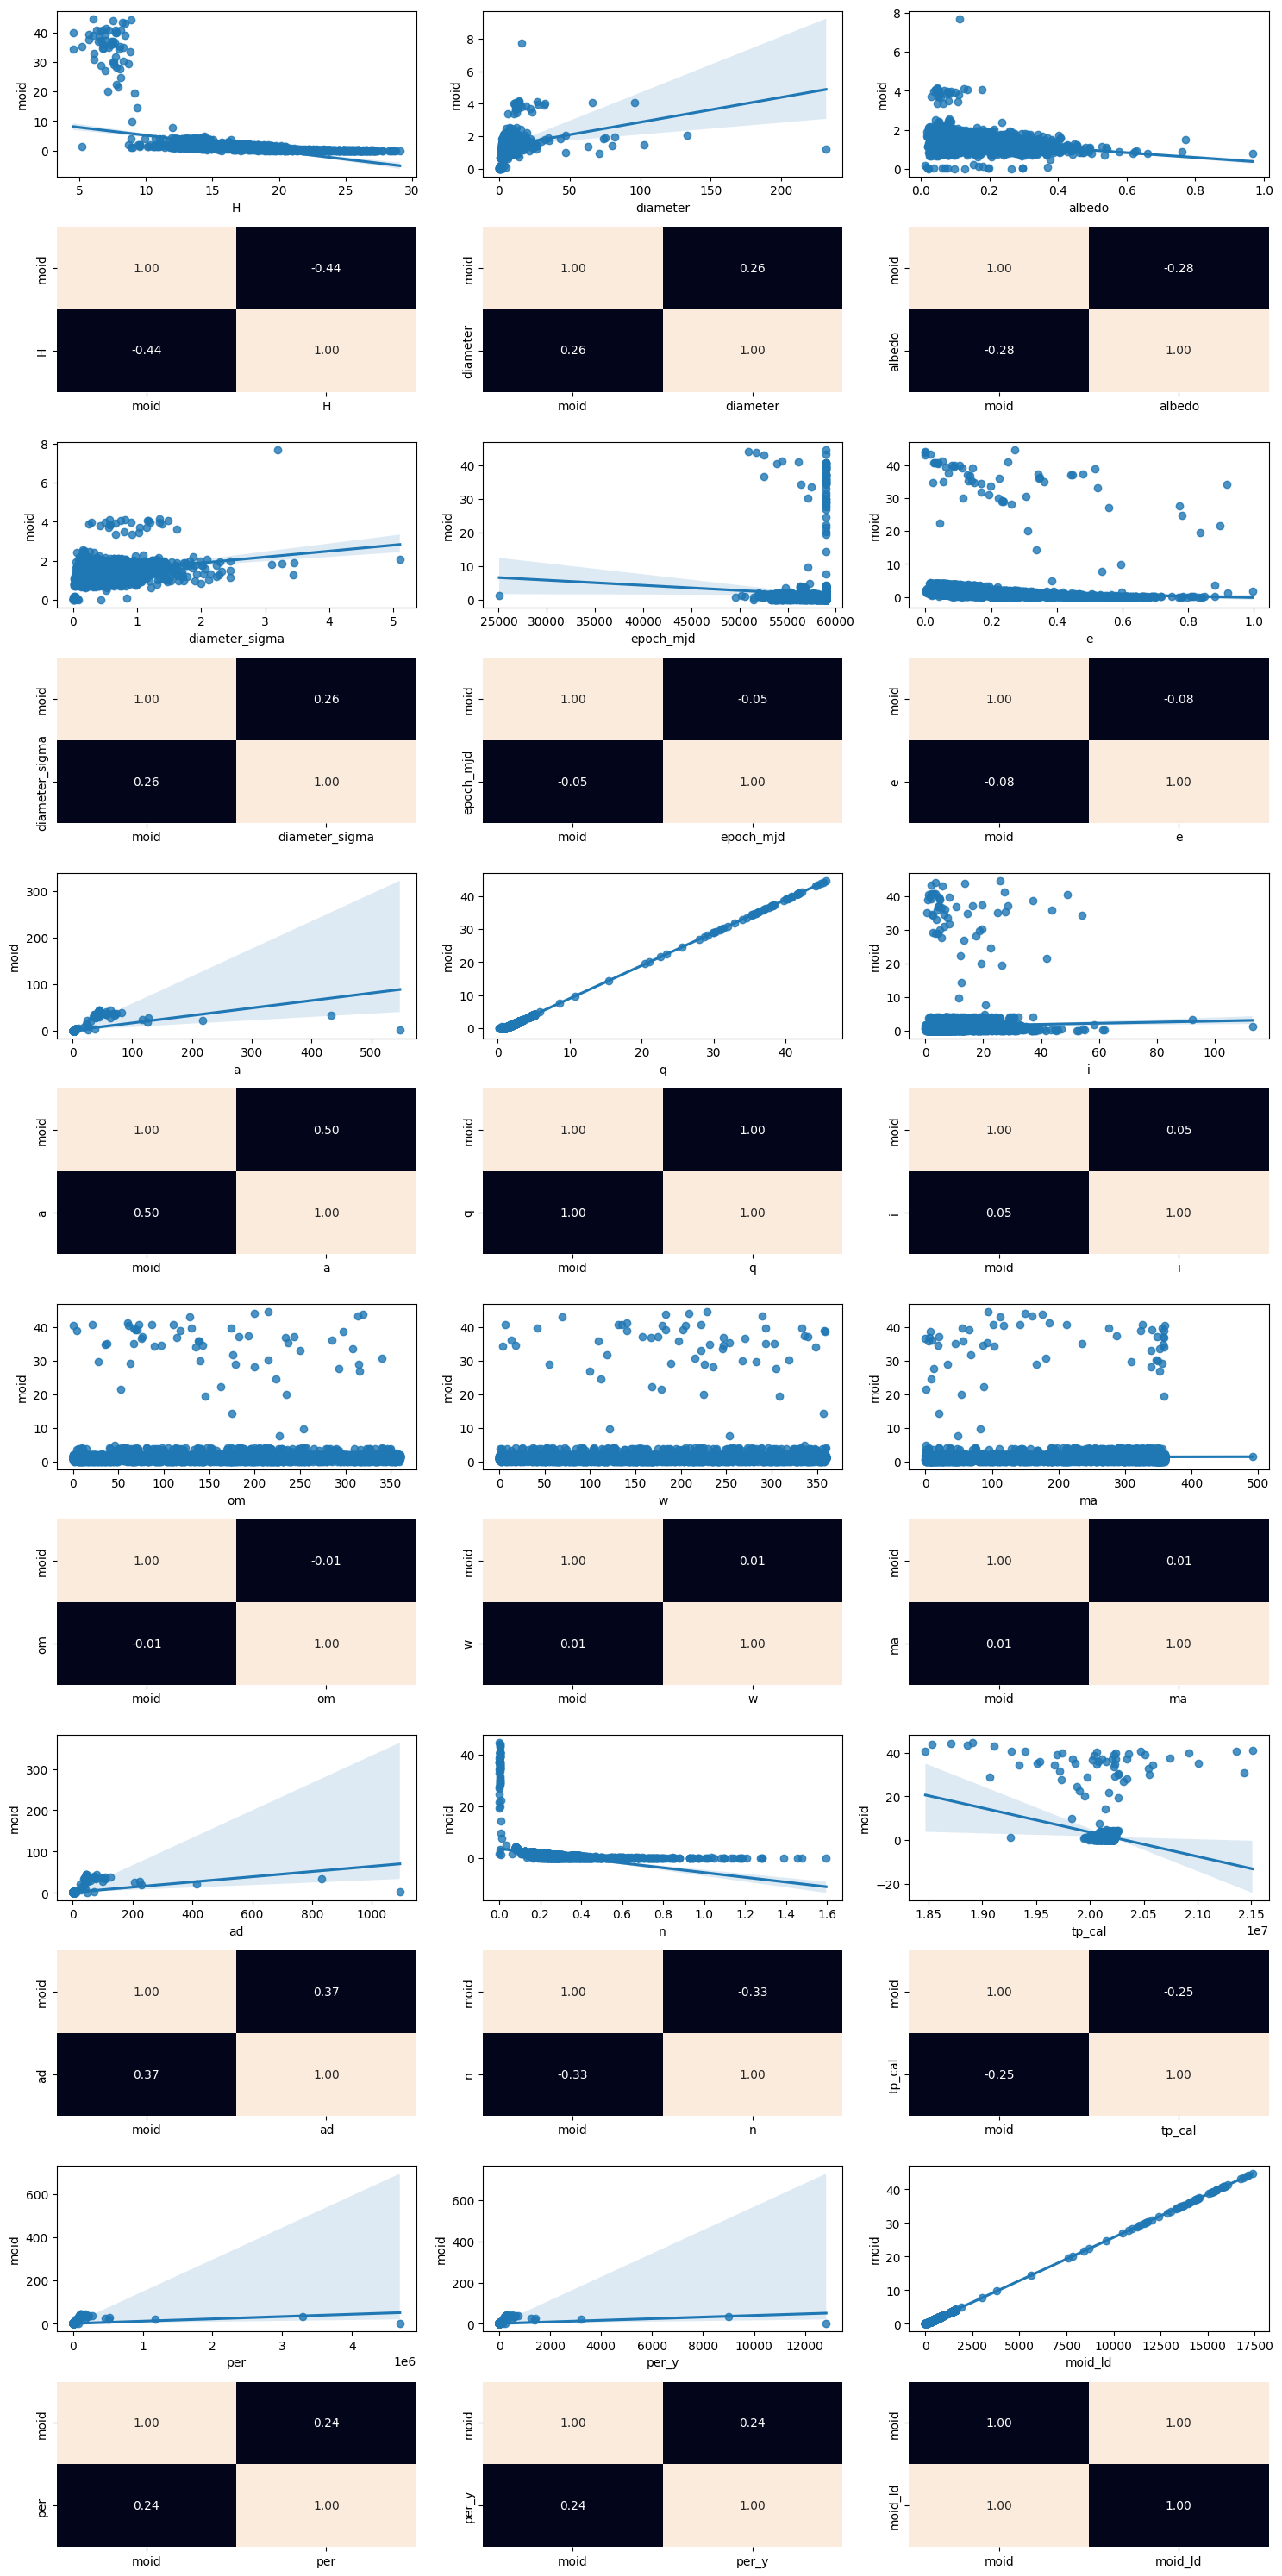

In [19]:
# Analisis numerico - numerico

#H', 'diameter', 'albedo', 'diameter_sigma', 'epoch_mjd', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'neo_n', 'pha_n', 'class_n'

import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(12, 3, figsize=(15, 30))
#Create scatter plots and heatmaps
sns.regplot(data=sample_database, x="H", y="moid", ax=axis[0, 0]) 
sns.heatmap(sample_database[["moid", "H"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(data=sample_database, x="diameter", y="moid", ax=axis[0, 1]) 
sns.heatmap(sample_database[["moid", "diameter"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(data=sample_database, x="albedo", y="moid", ax=axis[0, 2]) 
sns.heatmap(sample_database[["moid", "albedo"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)

sns.regplot(data=sample_database, x="diameter_sigma", y="moid", ax=axis[2, 0]) 
sns.heatmap(sample_database[["moid", "diameter_sigma"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(data=sample_database, x="epoch_mjd", y="moid", ax=axis[2, 1]) 
sns.heatmap(sample_database[["moid", "epoch_mjd"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(data=sample_database, x="e", y="moid", ax=axis[2, 2]) 
sns.heatmap(sample_database[["moid", "e"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2], cbar=False)

sns.regplot(data=sample_database, x="a", y="moid", ax=axis[4, 0]) 
sns.heatmap(sample_database[["moid", "a"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0], cbar=False)

sns.regplot(data=sample_database, x="q", y="moid", ax=axis[4, 1]) 
sns.heatmap(sample_database[["moid", "q"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)

sns.regplot(data=sample_database, x="i", y="moid", ax=axis[4, 2]) 
sns.heatmap(sample_database[["moid", "i"]].corr(), annot=True, fmt=".2f", ax=axis[5, 2], cbar=False)

sns.regplot(data=sample_database, x="om", y="moid", ax=axis[6, 0]) 
sns.heatmap(sample_database[["moid", "om"]].corr(), annot=True, fmt=".2f", ax=axis[7, 0], cbar=False)

sns.regplot(data=sample_database, x="w", y="moid", ax=axis[6, 1]) 
sns.heatmap(sample_database[["moid", "w"]].corr(), annot=True, fmt=".2f", ax=axis[7, 1], cbar=False)

sns.regplot(data=sample_database, x="ma", y="moid", ax=axis[6, 2]) 
sns.heatmap(sample_database[["moid", "ma"]].corr(), annot=True, fmt=".2f", ax=axis[7, 2], cbar=False)

sns.regplot(data=sample_database, x="ad", y="moid", ax=axis[8, 0]) 
sns.heatmap(sample_database[["moid", "ad"]].corr(), annot=True, fmt=".2f", ax=axis[9, 0], cbar=False)

sns.regplot(data=sample_database, x="n", y="moid", ax=axis[8, 1]) 
sns.heatmap(sample_database[["moid", "n"]].corr(), annot=True, fmt=".2f", ax=axis[9, 1], cbar=False)

sns.regplot(data=sample_database, x="tp_cal", y="moid", ax=axis[8, 2]) 
sns.heatmap(sample_database[["moid", "tp_cal"]].corr(), annot=True, fmt=".2f", ax=axis[9, 2], cbar=False)

sns.regplot(data=sample_database, x="per", y="moid", ax=axis[10, 0]) 
sns.heatmap(sample_database[["moid", "per"]].corr(), annot=True, fmt=".2f", ax=axis[11, 0], cbar=False)

sns.regplot(data=sample_database, x="per_y", y="moid", ax=axis[10, 1]) 
sns.heatmap(sample_database[["moid", "per_y"]].corr(), annot=True, fmt=".2f", ax=axis[11, 1], cbar=False)

sns.regplot(data=sample_database, x="moid_ld", y="moid", ax=axis[10, 2]) 
sns.heatmap(sample_database[["moid", "moid_ld"]].corr(), annot=True, fmt=".2f", ax=axis[11, 2], cbar=False)

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()


In [1]:
# Entrenamiento del modelo
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib

# Cargar datos desde train.csv
train = pd.read_csv('clean_train.csv')

# Seleccionar características y objetivo
X = train[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']]
y = train['moid']

# Entrenar un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Guardar el modelo entrenado
joblib.dump(model, 'moid_model.pkl')


KeyboardInterrupt: 